In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:

df = pd.read_csv('housing.csv')
print(df.head())  


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [3]:
print(df.isnull().sum())  
df_clean = df.dropna()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [4]:
X = df_clean.drop('median_house_value', axis=1)
y = df_clean['median_house_value']


In [5]:
X = pd.get_dummies(X, drop_first=True)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
y_pred = model.predict(X_test)


In [9]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)


Mean Absolute Error: 50413.4333081004
Mean Squared Error: 4802173538.604191
R2 Score: 0.648840215443197


In [10]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coef_df)


                       Feature    Coefficient
0                    longitude  -27108.746321
1                     latitude  -25657.807543
2           housing_median_age    1081.364206
3                  total_rooms      -6.322146
4               total_bedrooms     103.004042
5                   population     -36.409751
6                   households      43.142725
7                median_income   39277.083020
8       ocean_proximity_INLAND  -39240.217778
9       ocean_proximity_ISLAND  213653.374463
10    ocean_proximity_NEAR BAY   -6232.416876
11  ocean_proximity_NEAR OCEAN    3166.477128


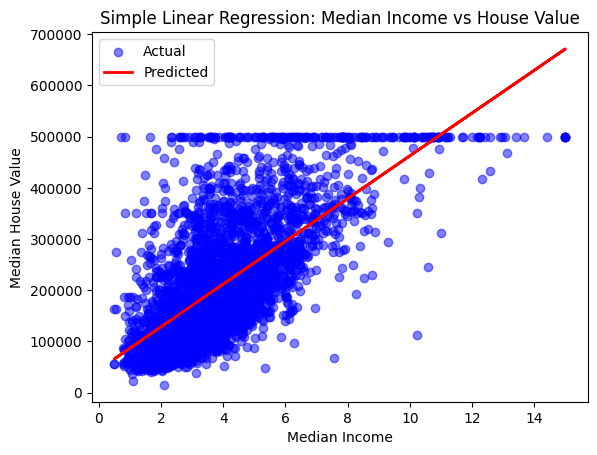

In [11]:
X_inc = df_clean[['median_income']]
y_val = df_clean['median_house_value']
X_train_inc, X_test_inc, y_train_inc, y_test_inc = train_test_split(
    X_inc, y_val, test_size=0.2, random_state=42
)
simple_model = LinearRegression()
simple_model.fit(X_train_inc, y_train_inc)
y_pred_inc = simple_model.predict(X_test_inc)

plt.scatter(X_test_inc, y_test_inc, color='blue', alpha=0.5, label='Actual')
plt.plot(X_test_inc, y_pred_inc, color='red', linewidth=2, label='Predicted')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.title('Simple Linear Regression: Median Income vs House Value')
plt.show()


In [12]:

pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).to_csv('predictions.csv', index=False)
